# Lab 1 Analysis Example using Thicket

In [29]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [30]:
# # jupyter
# tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

# local
parallel = 'cuda'
algo = 'strassen'

# GLOBAL VARS
process_cols = (1, 2, 4, 8, 16, 32) # CUDA NAIVE

tk = th.Thicket.from_caliperreader(glob(f"../caliper/{parallel}/{algo}/*.cali", recursive=True))

# Performance data
tk.dataframe.head(20)
# tk.metadata

nid   spot.channel  \
node                                 profile                          
{'name': 'comm', 'type': 'function'} 34377063      8  regionprofile   
                                     77781213      8  regionprofile   
                                     123164685     8  regionprofile   
                                     224594966     8  regionprofile   
                                     252749223     8  regionprofile   
                                     294407713     8  regionprofile   
                                     316112774     8  regionprofile   
                                     504632361     8  regionprofile   
                                     510396243     8  regionprofile   
                                     525303202     8  regionprofile   
                                     791783130     8  regionprofile   
                                     874710546     8  regionprofile   
                                     1071589130    8  regionprofile   
                                     1086242776    8  regionprofile   
                                     1185835198    8  regionprofile   
                                     1211510704    8  regionprofile   
                                     1227632366    8  regionprofile   
                                     1452092162    8  regionprofile   
                                     1639813706    8  regionprofile   
                                     1715829552    8  regionprofile   

                                                 Min time/rank  Max time/rank  \
node                                 profile                                    
{'name': 'comm', 'type': 'function'} 34377063         0.095960       0.095960   
                                     77781213         0.001413       0.001413   
                                     123164685        0.008280       0.008280   
                                     224594966        0.024910       0.024910   
                                     252749223        0.095483       0.095483   
                                     294407713        0.008002       0.008002   
                                     316112774        0.002542       0.002542   
                                     504632361        0.002532       0.002532   
                                     510396243        0.000945       0.000945   
                                     525303202        0.002558       0.002558   
                                     791783130        0.024540       0.024540   
                                     874710546        0.000944       0.000944   
                                     1071589130       0.000812       0.000812   
                                     1086242776       0.000828       0.000828   
                                     1185835198       0.002560       0.002560   
                                     1211510704       0.001304       0.001304   
                                     1227632366       0.001281       0.001281   
                                     1452092162       0.025512       0.025512   
                                     1639813706       0.007863       0.007863   
                                     1715829552       0.000975       0.000975   

                                                 Avg time/rank  Total time  \
node                                 profile                                 
{'name': 'comm', 'type': 'function'} 34377063         0.095960    0.095960   
                                     77781213         0.001413    0.001413   
                                     123164685        0.008280    0.008280   
                                     224594966        0.024910    0.024910   
                                     252749223        0.095483    0.095483   
                                     294407713        0.008002    0.008002   
                                     316112774        0.002542    0.002542   
 

Compose these 3 groups column-wise to get a holistic view of the data

In [31]:
gb = tk.groupby("num_threads")

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk.dataframe.head(20)

6  thickets created...
{1: <thicket.thicket.Thicket object at 0x0000017F2CB82010>, 2: <thicket.thicket.Thicket object at 0x0000017F2CA8C4D0>, 4: <thicket.thicket.Thicket object at 0x0000017F2B63D6D0>, 8: <thicket.thicket.Thicket object at 0x0000017F2C1444D0>, 16: <thicket.thicket.Thicket object at 0x0000017F2CE96D90>, 32: <thicket.thicket.Thicket object at 0x0000017F2C404410>}


1                 \
                                                     nid   spot.channel   
node                                       InputSize                      
{'name': 'comm', 'type': 'function'}       128         8  regionprofile   
                                           256         8  regionprofile   
                                           512         8  regionprofile   
                                           1024        8  regionprofile   
                                           2048        8  regionprofile   
                                           4096        8  regionprofile   
{'name': 'cudamemcpy', 'type': 'function'} 128         9  regionprofile   
                                           256         9  regionprofile   
                                           512         9  regionprofile   
                                           1024        9  regionprofile   
                                           2048        9  regionprofile   
                                           4096        9  regionprofile   
{'name': 'comp', 'type': 'function'}       128         3  regionprofile   
                                           256         3  regionprofile   
                                           512         3  regionprofile   
                                           1024        3  regionprofile   
                                           2048        3  regionprofile   
                                           4096        3  regionprofile   
{'name': 'comp_large', 'type': 'function'} 128        11  regionprofile   
                                           256        11  regionprofile   

                                                                    \
                                                     Min time/rank   
node                                       InputSize                 
{'name': 'comm', 'type': 'function'}       128            0.000812   
                                           256            0.001413   
                                           512            0.002549   
                                           1024           0.007863   
                                           2048           0.024910   
                                           4096           0.094219   
{'name': 'cudamemcpy', 'type': 'function'} 128            0.000568   
                                           256            0.001115   
                                           512            0.002279   
                                           1024           0.007534   
                                           2048           0.024486   
                                           4096           0.093698   
{'name': 'comp', 'type': 'function'}       128            0.001944   
                                           256            0.005569   
                                           512            0.031816   
                                           1024           0.183608   
                                           2048           1.232601   
                                           4096           9.433008   
{'name': 'comp_large', 'type': 'function'} 128            0.000119   
                                           256            0.000399   

                                                                    \
                                                     Max time/rank   
node                                       InputSize                 
{'name': 'comm', 'type': 'function'}       128            0.000812   
                                           256            0.001413   
                                           512            0.002549   
                                           1024           0.007863   
                                           2048           0.024910   
                                           4096           0.094219   
{'name': 'cudamemcpy', 'type': 'function'} 128            0.000568   
                  

Perform pandas operations to get the table in a desirable format for plotting

In [32]:
# Drop unwanted columns
array = [("node","")]
for i in process_cols:
    # comment out the one you wnat to plot
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    array.append((i,"Min time/rank"))
    array.append((i,"Max time/rank"))
    # array.append((i,"Avg time/rank"))
    array.append((i,"Total time"))
    array.append((i, 'Avg GPU time/rank'))
    array.append((i, 'Min GPU time/rank'))
    array.append((i, 'Max GPU time/rank'))
    array.append((i, 'Total GPU time'))

ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

ctk.dataframe.columns

MultiIndex([( 1, 'Avg time/rank'),
            ( 2, 'Avg time/rank'),
            ( 4, 'Avg time/rank'),
            ( 8, 'Avg time/rank'),
            (16, 'Avg time/rank'),
            (32, 'Avg time/rank')],
           )

In [33]:
# ctk.dataframe.loc['comp_large']

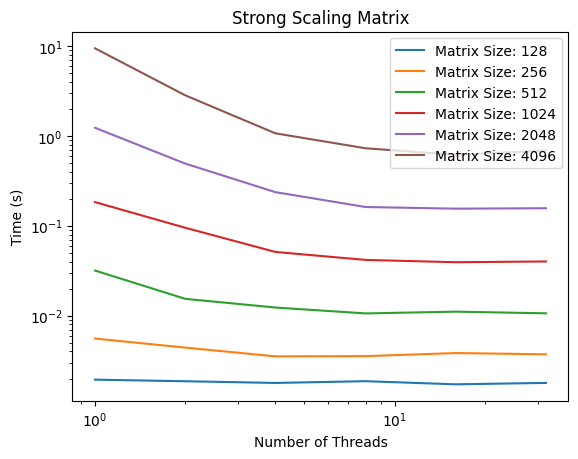

                      1             2             4             8  \
          Avg time/rank Avg time/rank Avg time/rank Avg time/rank   
InputSize                                                           
128            0.001944      0.001867      0.001787      0.001869   
256            0.005569      0.004419      0.003532      0.003552   
512            0.031816      0.015410      0.012331      0.010608   
1024           0.183608      0.095190      0.051215      0.041778   
2048           1.232601      0.492498      0.237020      0.161946   
4096           9.433008      2.832121      1.069231      0.729052   

                     16            32  
          Avg time/rank Avg time/rank  
InputSize                              
128            0.001725      0.001789  
256            0.003841      0.003723  
512            0.011098      0.010635  
1024           0.039355      0.040136  
2048           0.155160      0.156986  
4096           0.616980      0.685907  
1     0.001944
4  

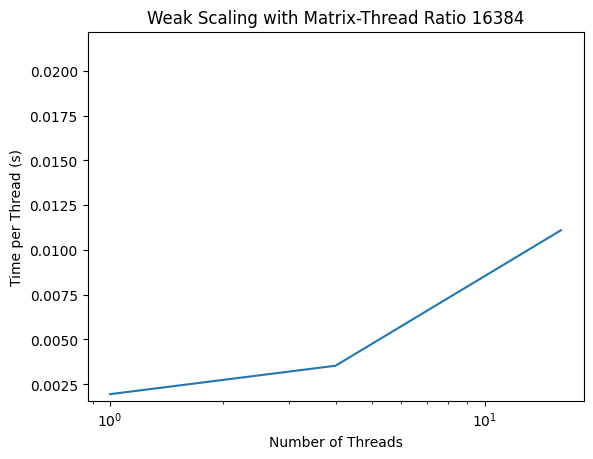

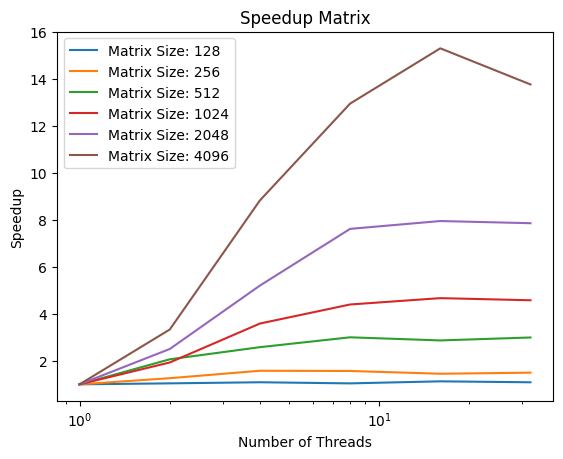

In [36]:
# Plot stuff!
df = ctk.dataframe
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]
caliper_label = 'comp'

# Strong Scaling: Time vs Procs
for matrix_size in matrix_sizes:
    data = df.loc[caliper_label, matrix_size]
    data.index = data.index.droplevel(1)
    axis = data.plot(
        title=f"Strong Scaling Matrix",
        label=f"Matrix Size: {matrix_size}",
        xlabel="Number of Threads",
        ylabel="Time (s)",
    )
    axis.set_xscale("log")
    axis.set_yscale("log")
plt.legend()
plt.show()


# Weak Scaling: Time per Proc vs Procs
import numpy as np
subset = df.loc[caliper_label]
print(subset)
data = []
labels = []
ratio = subset.index[0]**2 // subset.columns[0][0]
for i in range(subset.shape[1]):
    num_procs = subset.columns[i][0]
    target_size = (num_procs * ratio) ** 0.5
    try:
        data.append(subset.iloc[:, i].loc[target_size])
        labels.append(num_procs)
    except KeyError:
        continue
data = pd.Series(data)
data.index = labels
print(data)
# data = pd.Series(np.diag(df.loc[caliper_label].to_numpy()))
# data.index = matrix_sizes
plt.plot(data)
plt.title(f"Weak Scaling with Matrix-Thread Ratio {ratio}")
plt.xlabel("Number of Threads")
plt.ylabel("Time per Thread (s)")
plt.ylim(min(data) * 0.8, max(data) * 2)
plt.xscale("log")
# plt.yscale("log")
plt.show()


# Speedup: Sequential Time / Parallel Time vs Procs
for matrix_size in matrix_sizes:
    data = df.loc[caliper_label, matrix_size]
    data.index = data.index.droplevel(1)
    data.name = f"Matrix Size: {matrix_size}"
    axis = (data.iloc[0] / data).plot(
        title=f"Speedup Matrix",
        xlabel="Number of Threads",
        ylabel="Speedup",
    )
    axis.name = f"Matrix Size: {matrix_size}"
    axis.set_xscale("log")
plt.legend()
plt.show()


KeyError: ('barrier', 128)

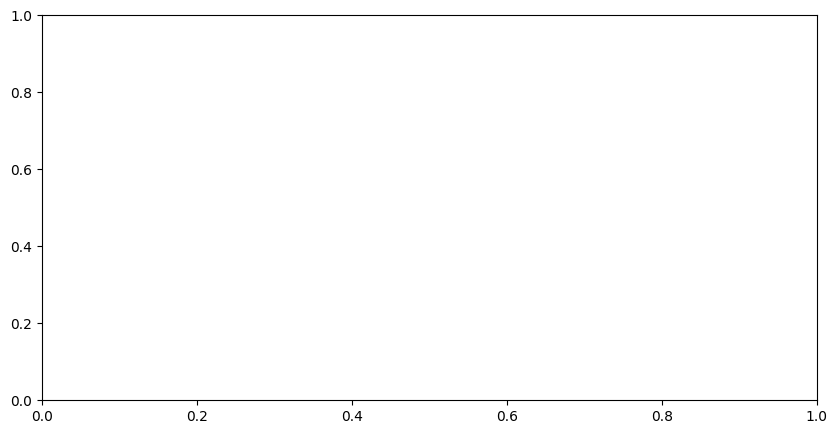

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df = ctk.dataframe

# Define the matrix sizes you want to plot
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# Define the communication and computation data series
comm = ["barrier", "bcast", "gather", "scatter"]
comp = ["comp_large", "data_init", "correctness"]

# Loop through matrix sizes and communication data series
for j, data_series in enumerate(comm):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")
        plt.show()

# Loop through matrix sizes and computation data series
for j, data_series in enumerate(comp):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")
        plt.show()

In [ ]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [ ]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [ ]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [ ]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [ ]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )